In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [11]:
df = pd.read_csv("dataset.csv")

In [17]:
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

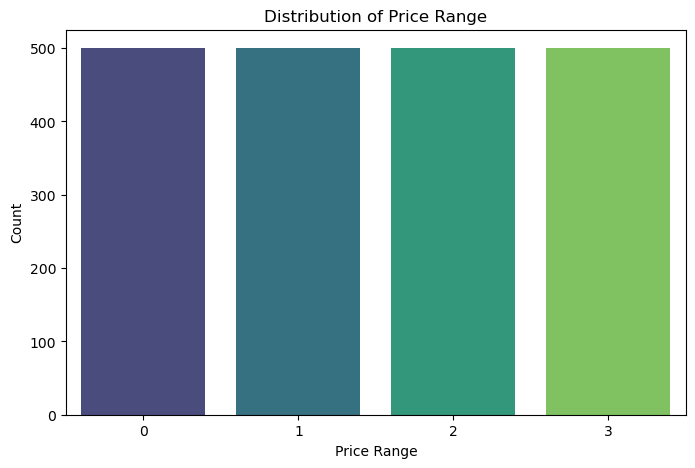

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df["price_range"], palette="viridis")
plt.title("Distribution of Price Range")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()


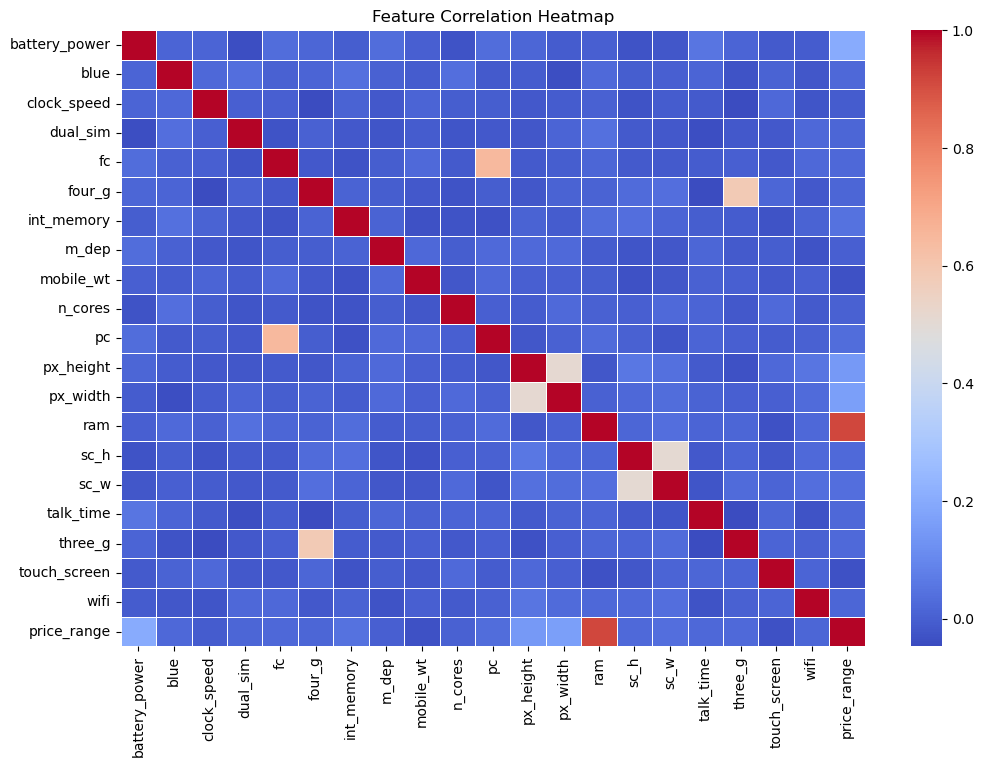

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

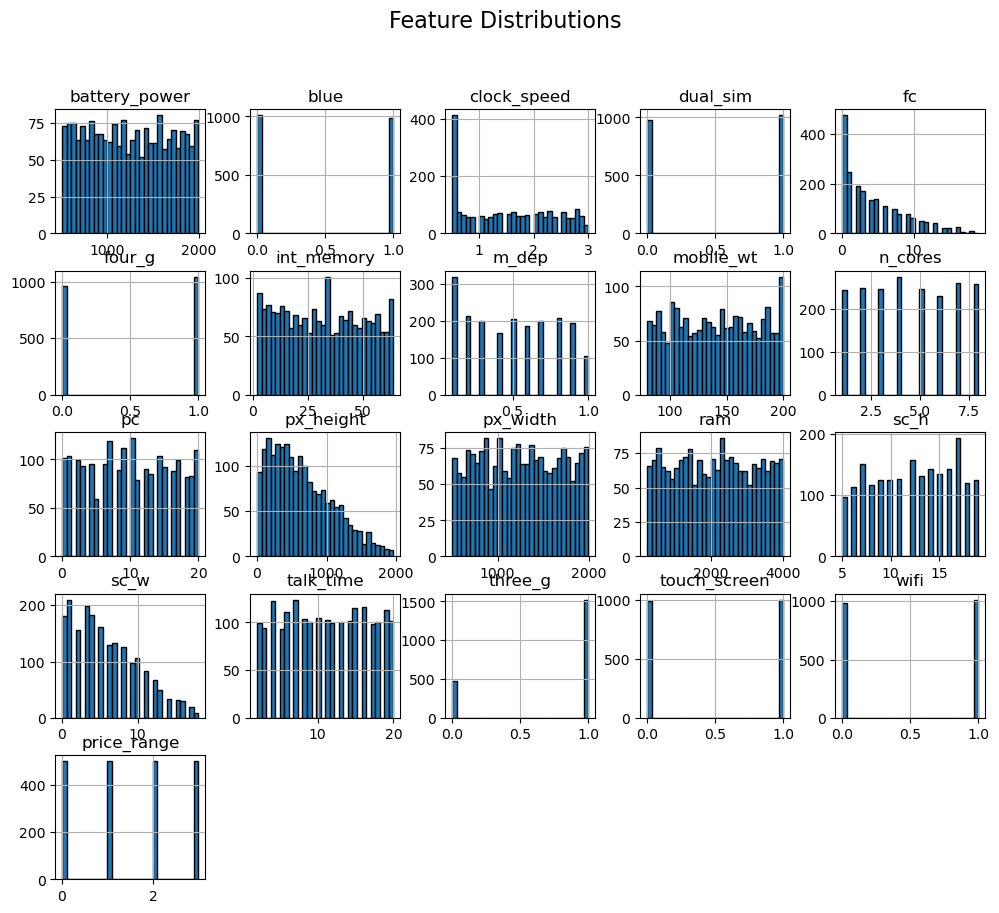

In [23]:
df.hist(figsize=(12, 10), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


In [25]:
X = df.drop(columns=["price_range"])  
y = df["price_range"]  


In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = model.predict(X_test)

In [33]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}\n")

Model Accuracy: 0.89



In [49]:
print("Classification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.96       105
           1       0.89      0.87      0.88        91
           2       0.78      0.87      0.82        92
           3       0.94      0.87      0.90       112

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.89      0.89       400



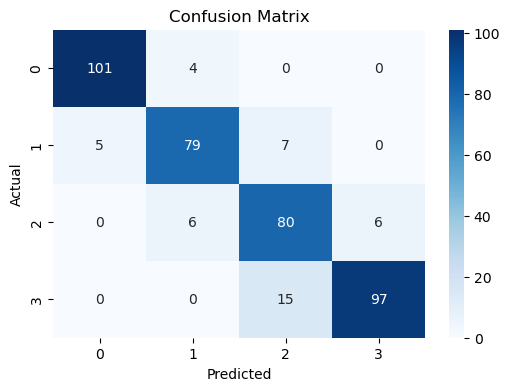

In [51]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=[0,1,2,3], yticklabels=[0,1,2,3])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [53]:
feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()

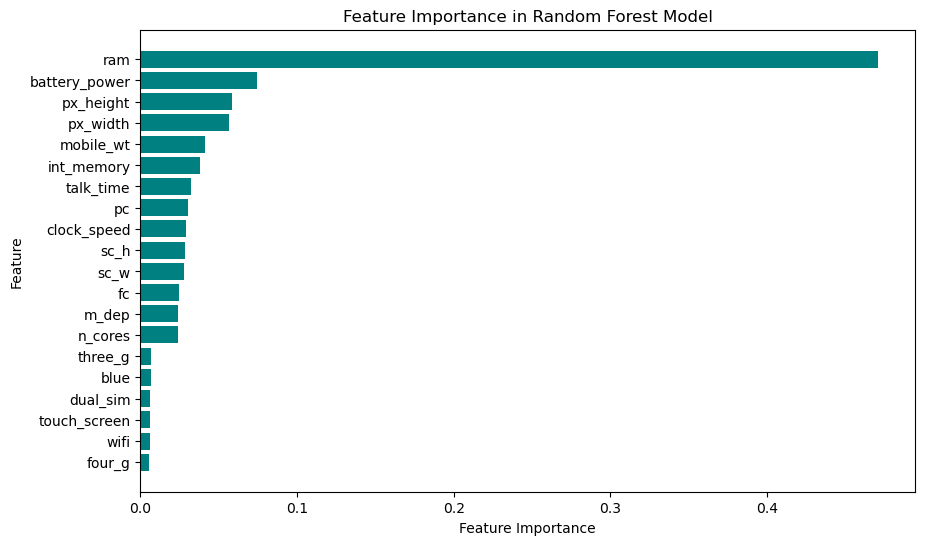

In [55]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx], color="teal")
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance in Random Forest Model")
plt.show()